In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:
#load dataset
df_main = pd.read_csv('D:\9-6-2024\Data Analysis_Module 5\Project\Cars.csv')

<>:2: SyntaxWarning: invalid escape sequence '\9'
<>:2: SyntaxWarning: invalid escape sequence '\9'
C:\Users\Seif Hisham\AppData\Local\Temp\ipykernel_23260\3871485168.py:2: SyntaxWarning: invalid escape sequence '\9'
  df_main = pd.read_csv('D:\9-6-2024\Data Analysis_Module 5\Project\Cars.csv')


In [3]:
df_main.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [4]:
df_main.shape

(4340, 8)

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
#numerical stats
df_main.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [7]:
#missing values
df_main.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
from datetime import datetime

current_year = datetime.now().year
print(current_year)

2024


In [9]:
df_main['Age'] = current_year - df_main['year']
df_main.drop('year',axis=1,inplace = True)

In [10]:
df_main.drop(labels='name',axis= 1, inplace = True)

In [11]:
df_main.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0          60000      70000  Petrol  Individual       Manual   First Owner   
1         135000      50000  Petrol  Individual       Manual   First Owner   
2         600000     100000  Diesel  Individual       Manual   First Owner   
3         250000      46000  Petrol  Individual       Manual   First Owner   
4         450000     141000  Diesel  Individual       Manual  Second Owner   

   Age  
0   17  
1   17  
2   12  
3    7  
4   10

In [12]:
unique_values = df_main['owner'].unique()
print(unique_values)

['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [13]:
owner_mapping = {
    'Test Drive Car': 0,
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,}
df_main['Owner_Code'] = df_main['owner'].map(owner_mapping)

In [14]:
df_main.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0          60000      70000  Petrol  Individual       Manual   First Owner   
1         135000      50000  Petrol  Individual       Manual   First Owner   
2         600000     100000  Diesel  Individual       Manual   First Owner   
3         250000      46000  Petrol  Individual       Manual   First Owner   
4         450000     141000  Diesel  Individual       Manual  Second Owner   

   Age  Owner_Code  
0   17           1  
1   17           1  
2   12           1  
3    7           1  
4   10           2

In [15]:
df_main.drop('owner',axis=1,inplace = True)

In [16]:
df_main.head()

selling_price  km_driven    fuel seller_type transmission  Age  Owner_Code
0          60000      70000  Petrol  Individual       Manual   17           1
1         135000      50000  Petrol  Individual       Manual   17           1
2         600000     100000  Diesel  Individual       Manual   12           1
3         250000      46000  Petrol  Individual       Manual    7           1
4         450000     141000  Diesel  Individual       Manual   10           2

In [41]:
def fuel_func(x):
    if x == 'CNG' or x == 'LPG' or x == 'Electric':
        return 'Others'
    else:
        return x
df_main.fuel = df_main.fuel.apply(fuel_func)
df_main.head()

selling_price  km_driven    fuel seller_type transmission  Age  Owner_Code
0          60000      70000  Petrol  Individual       Manual   17           1
1         135000      50000  Petrol  Individual       Manual   17           1
2         600000     100000  Diesel  Individual       Manual   12           1
3         250000      46000  Petrol  Individual       Manual    7           1
4         450000     141000  Diesel  Individual       Manual   10           2

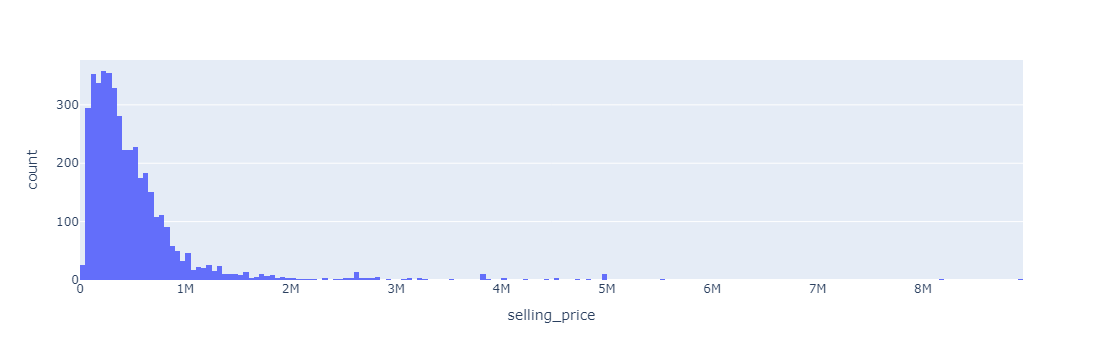

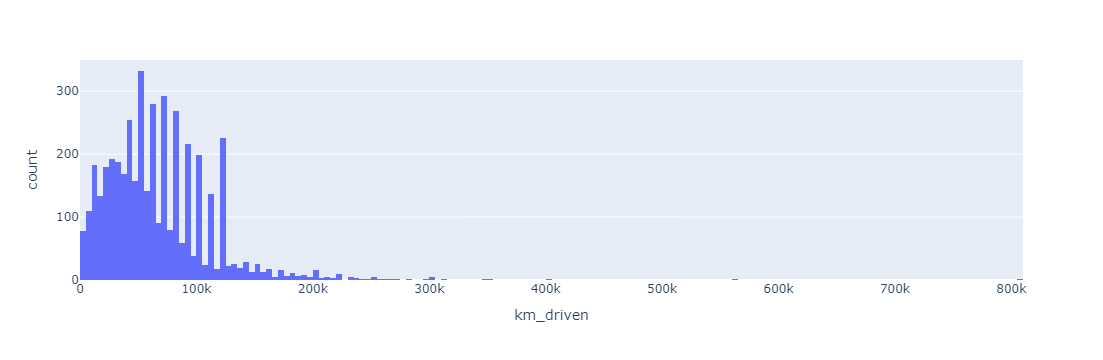

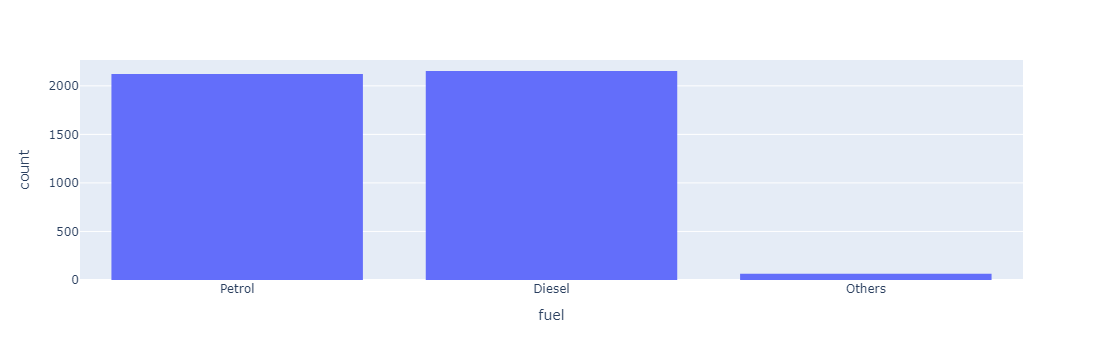

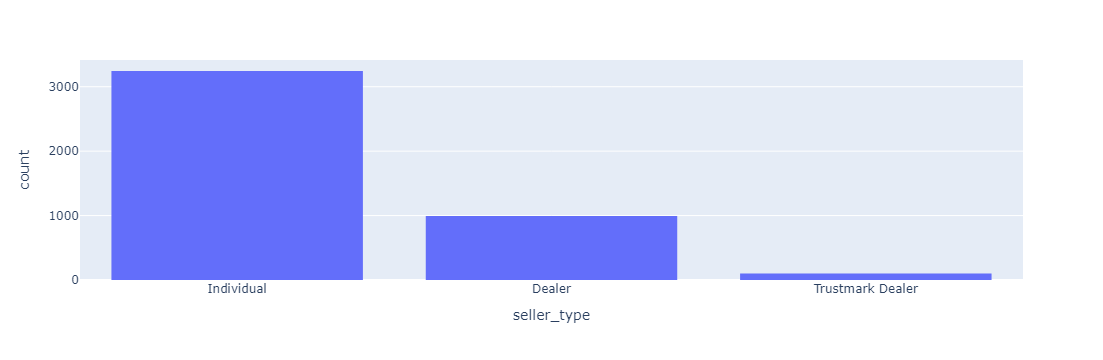

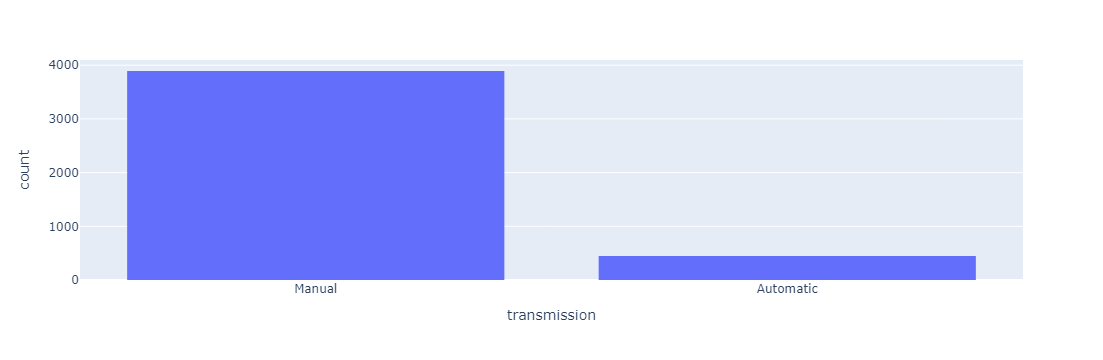

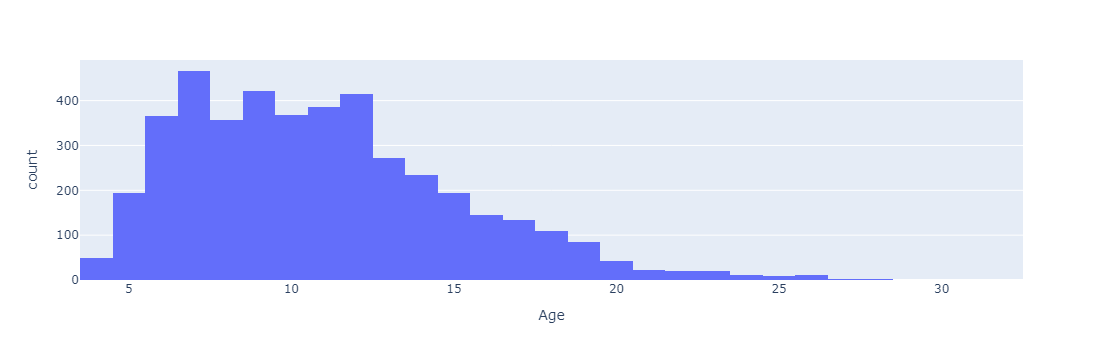

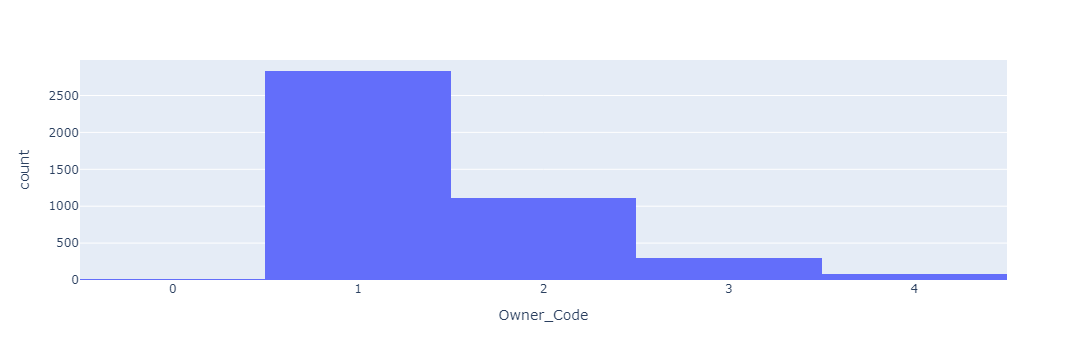

In [43]:
import plotly.express as px
for col in df_main.columns:
    fig = px.histogram(df_main,x=col)
    fig.show()

In [45]:
df_main.fuel.value_counts(normalize= True)*100

fuel
Diesel    49.608295
Petrol    48.917051
Others     1.474654
Name: proportion, dtype: float64

In [47]:
df_main.seller_type.value_counts(normalize= True)*100

seller_type
Individual          74.746544
Dealer              22.903226
Trustmark Dealer     2.350230
Name: proportion, dtype: float64

In [51]:
df_main.Age.value_counts(normalize= True)*100

Age
7     10.737327
9      9.700461
12     9.562212
11     8.894009
10     8.456221
6      8.433180
8      8.225806
13     6.244240
14     5.391705
5      4.493088
15     4.447005
16     3.341014
17     3.087558
18     2.534562
19     1.958525
4      1.105991
20     0.967742
21     0.529954
22     0.483871
23     0.460829
26     0.276498
24     0.276498
25     0.230415
27     0.069124
28     0.046083
29     0.023041
32     0.023041
Name: proportion, dtype: float64

In [55]:
df_main = df_main[df_main['Age'] < 25]

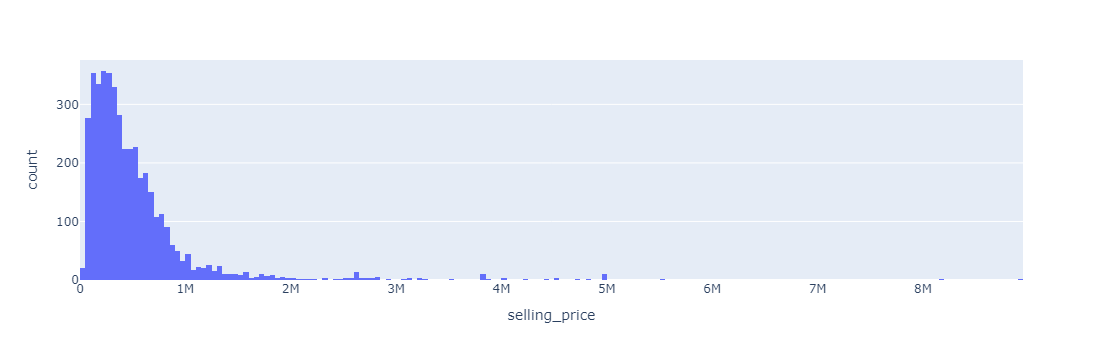

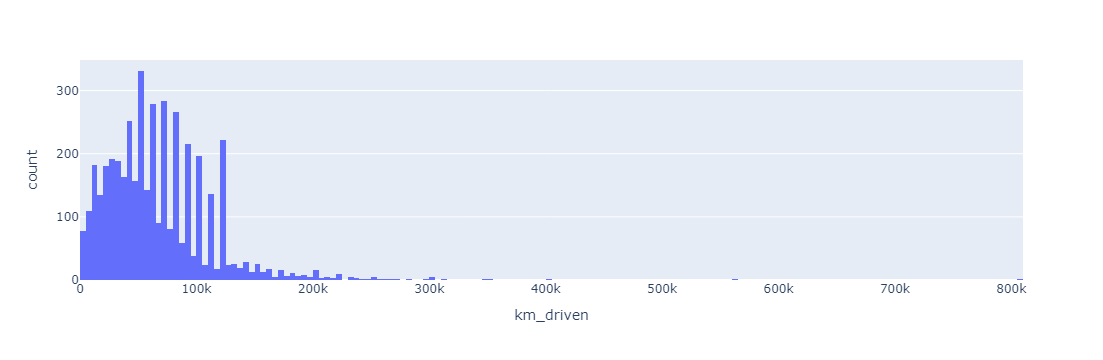

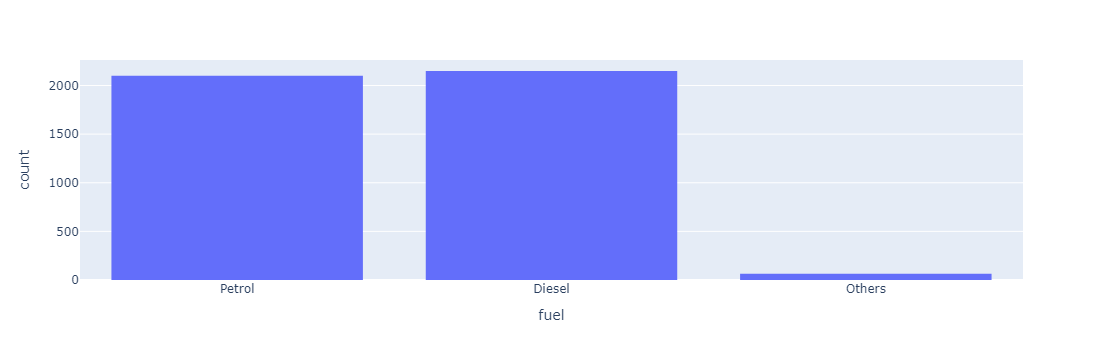

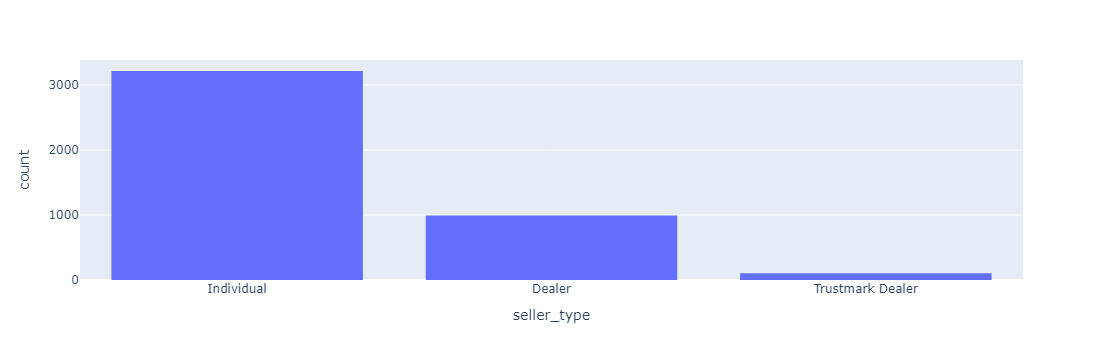

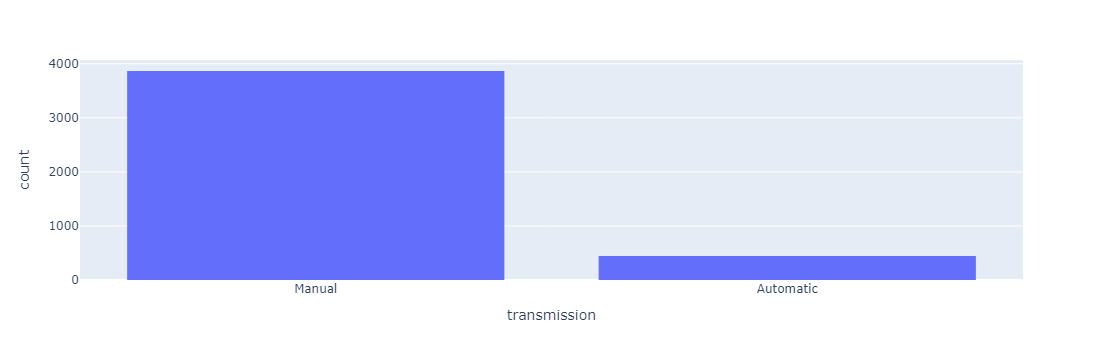

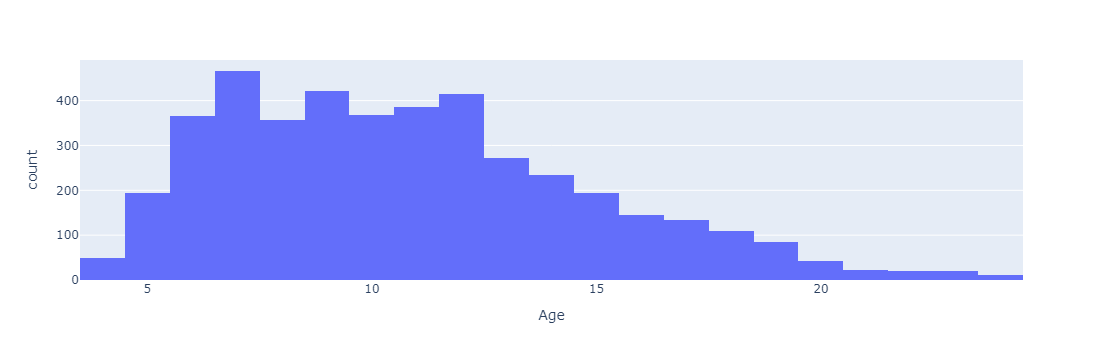

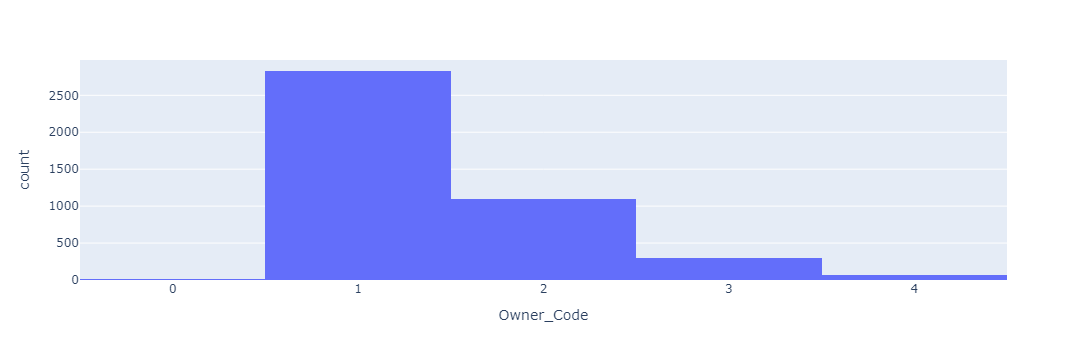

In [57]:
import plotly.express as px
for col in df_main.columns:
    fig = px.histogram(df_main,x=col)
    fig.show()

In [59]:
df_main.km_driven.value_counts(normalize= True)*100

km_driven
70000     5.288796
80000     5.242403
50000     5.126421
120000    5.010438
60000     4.940849
            ...   
80322     0.023196
28689     0.023196
143000    0.023196
13270     0.023196
112198    0.023196
Name: proportion, Length: 769, dtype: float64

In [61]:
df_main = df_main[df_main['km_driven'] < 300000]

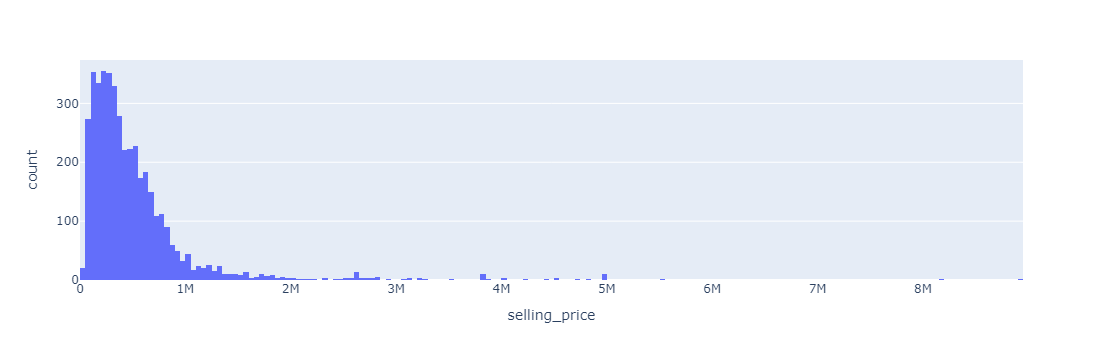

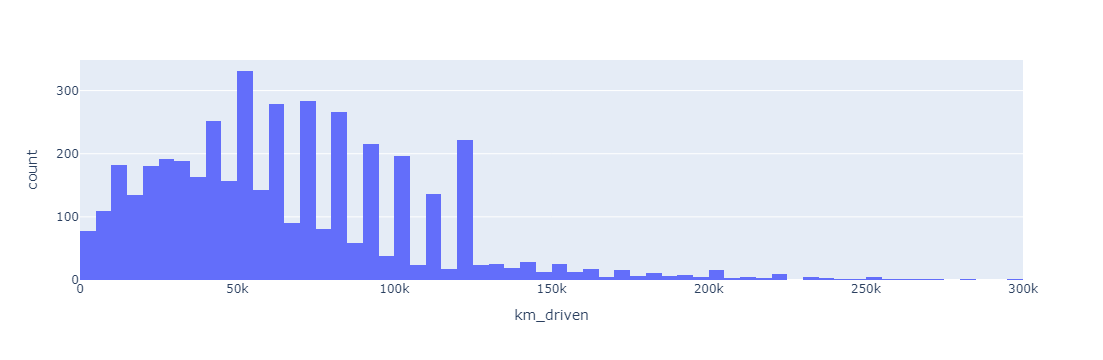

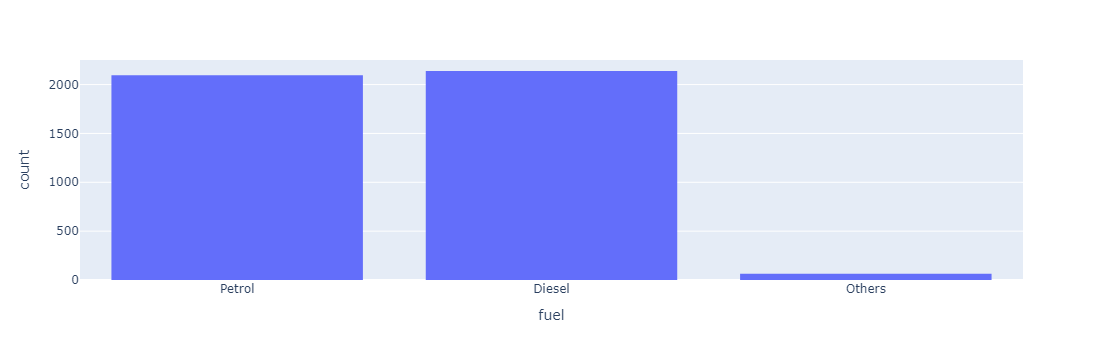

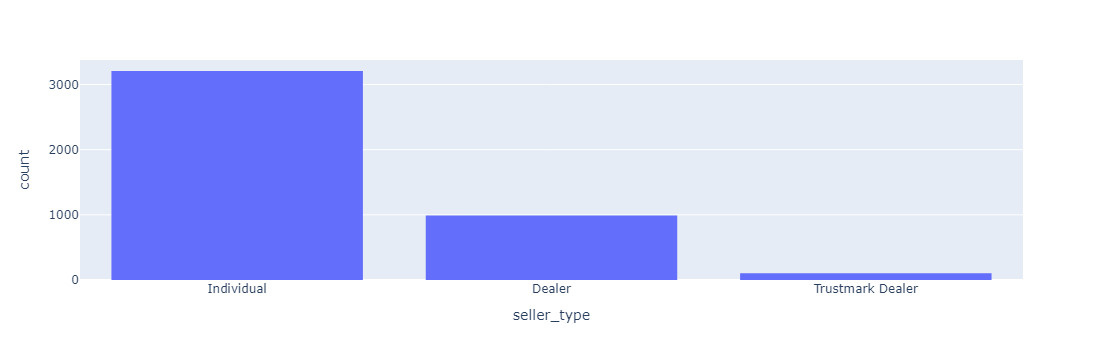

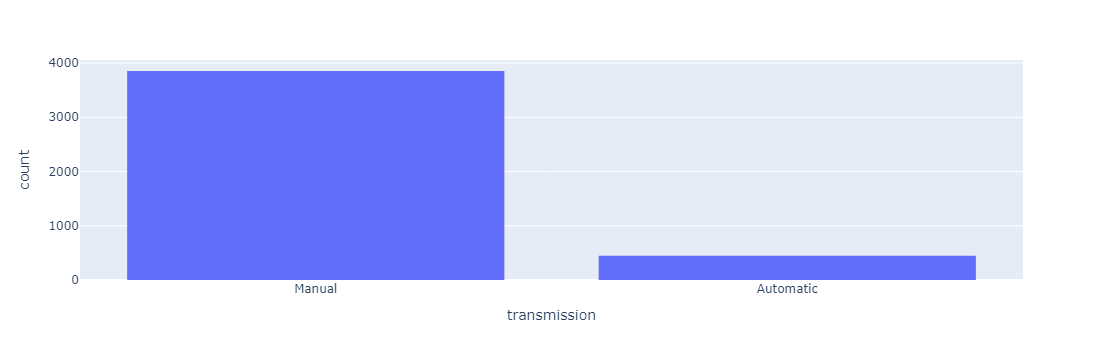

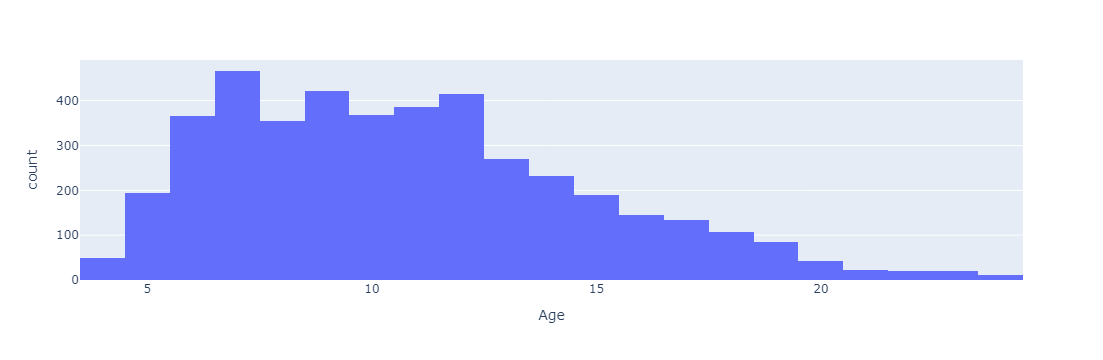

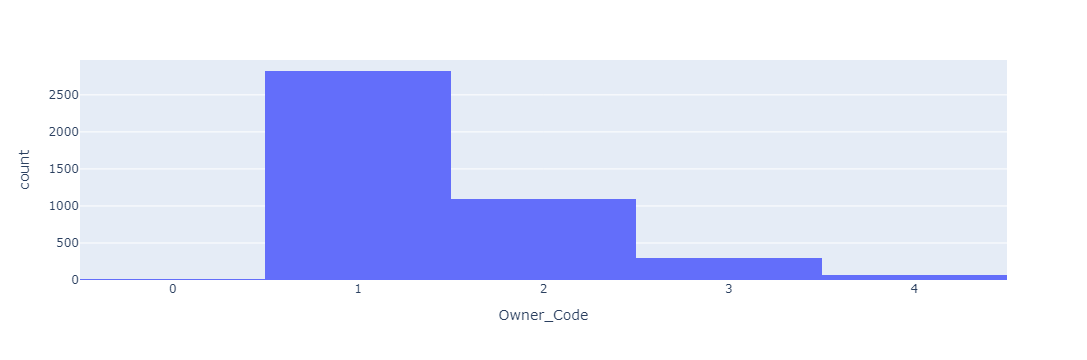

In [63]:
import plotly.express as px
for col in df_main.columns:
    fig = px.histogram(df_main,x=col)
    fig.show()

In [65]:
df_main = df_main[df_main['Owner_Code'] != 0]

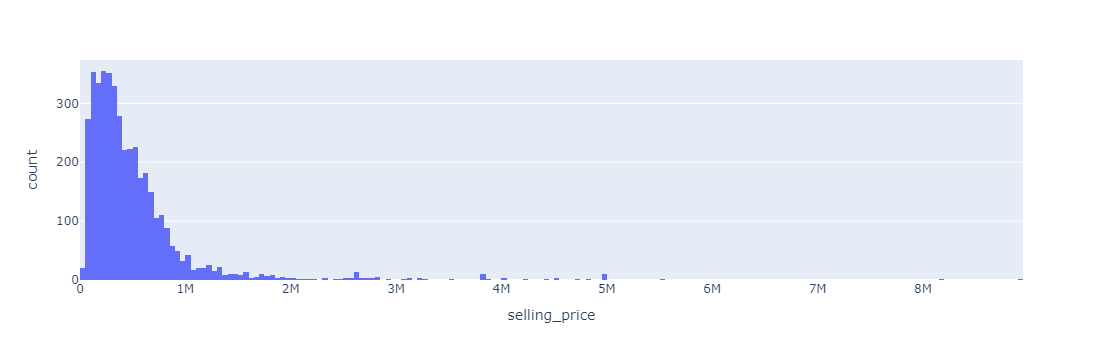

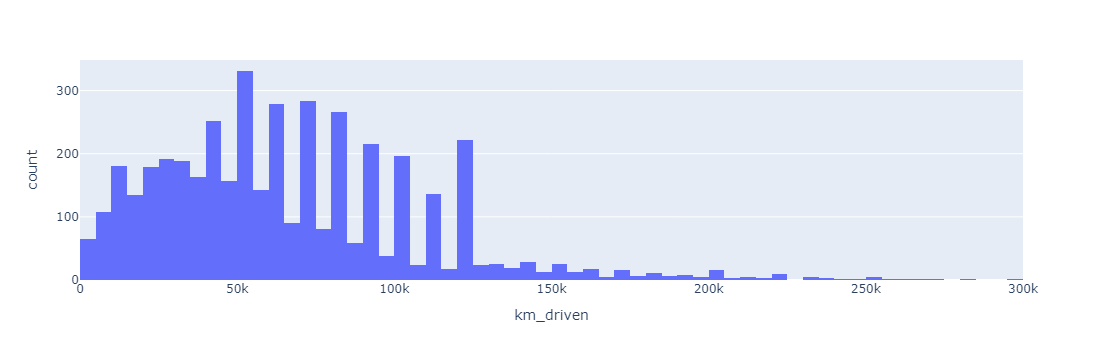

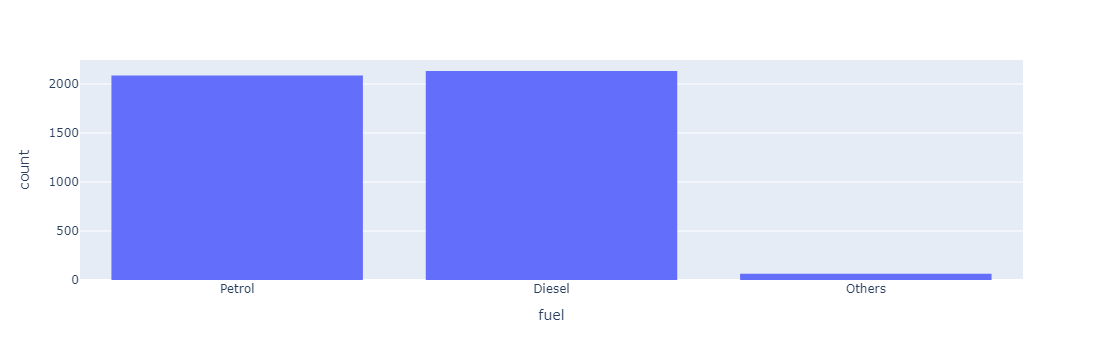

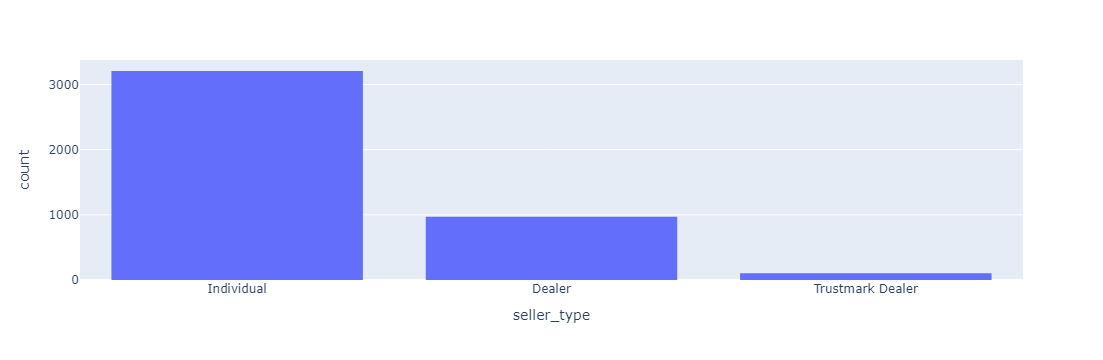

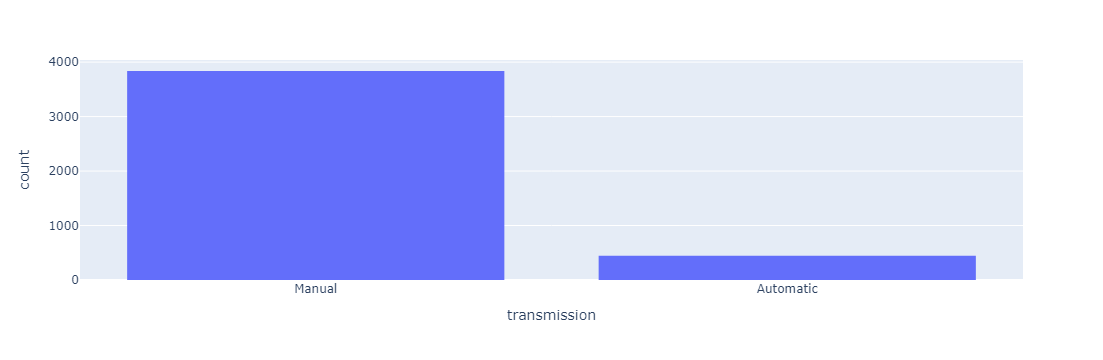

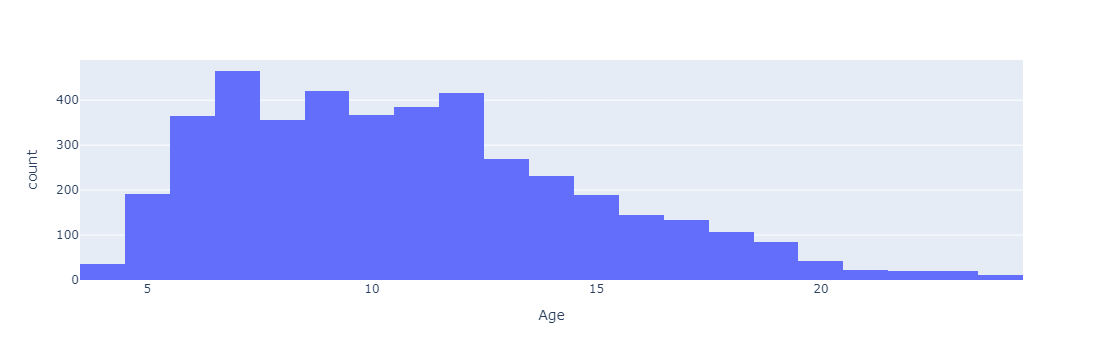

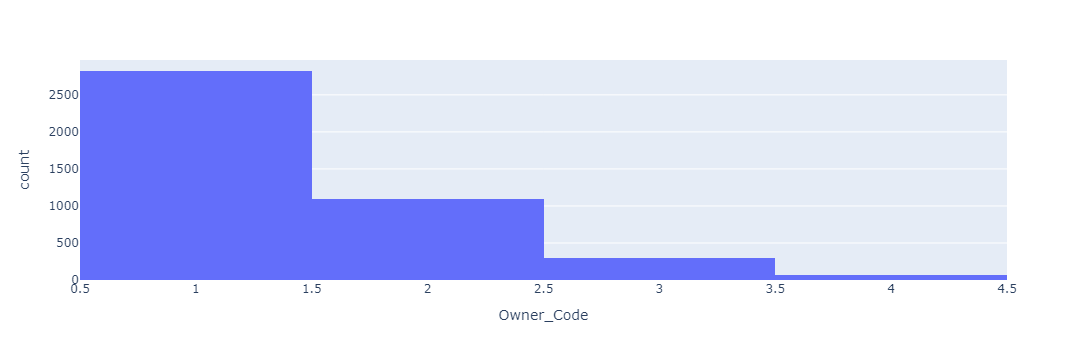

In [67]:
import plotly.express as px
for col in df_main.columns:
    fig = px.histogram(df_main,x=col)
    fig.show()

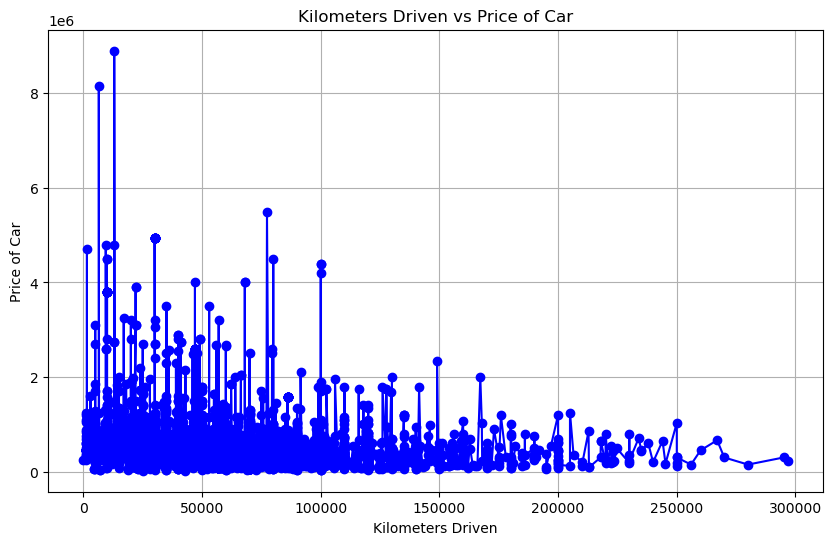

In [79]:
# Does the km driven affect selling price?
df_main_sorted = df_main.sort_values('km_driven')

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_main_sorted['km_driven'], df_main_sorted['selling_price'], marker='o', linestyle='-', color='blue')

# Adding title and labels
plt.title('Kilometers Driven vs Price of Car')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price of Car')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# The lower km driven the higher the selling price

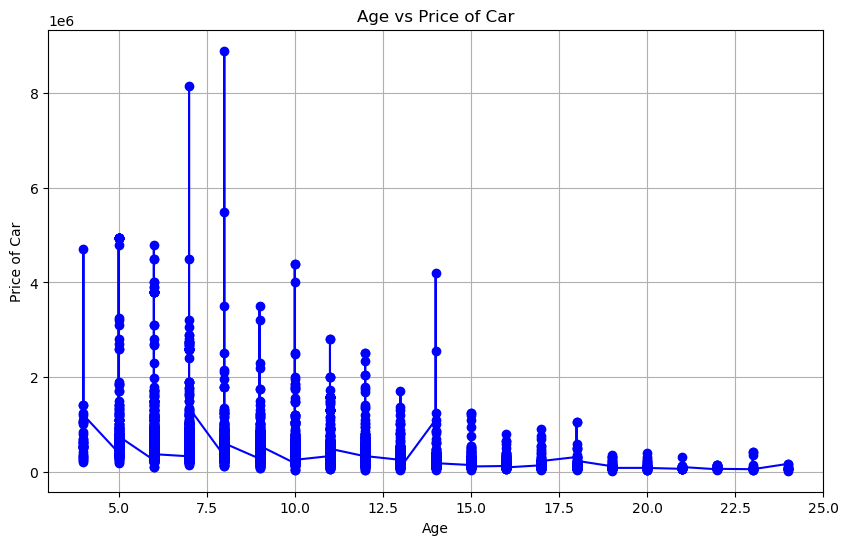

In [83]:
# Does the age driven affect selling price?
df_main_sorted = df_main.sort_values('Age')

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_main_sorted['Age'], df_main_sorted['selling_price'], marker='o', linestyle='-', color='blue')

# Adding title and labels
plt.title('Age vs Price of Car')
plt.xlabel('Age')
plt.ylabel('Price of Car')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# The lower the age the higher the selling price

C:\Users\Seif Hisham\AppData\Local\Temp\ipykernel_23260\2432810190.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




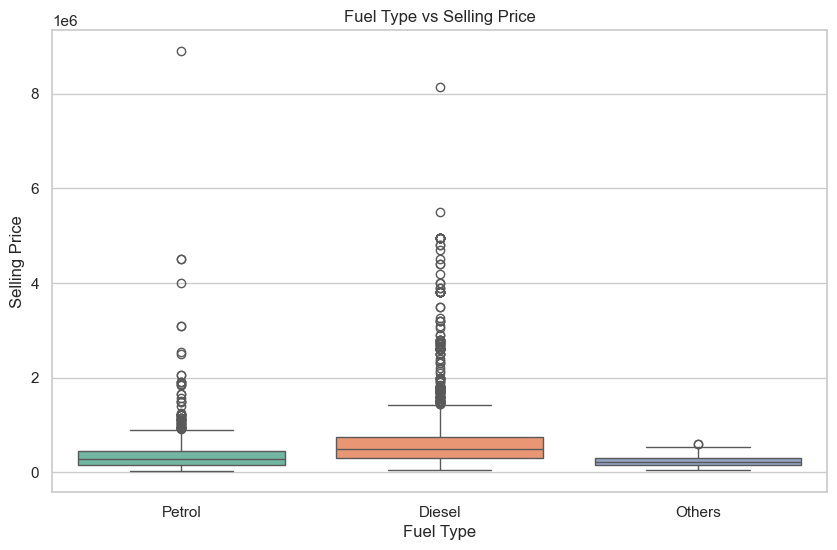

In [87]:
# Does the fuel type affect selling price?
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df_main, palette="Set2")

# Adding title and labels
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')

# Show the plot
plt.show()

In [ ]:
# On average, diesel type cars are higher in price

C:\Users\Seif Hisham\AppData\Local\Temp\ipykernel_23260\853647770.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




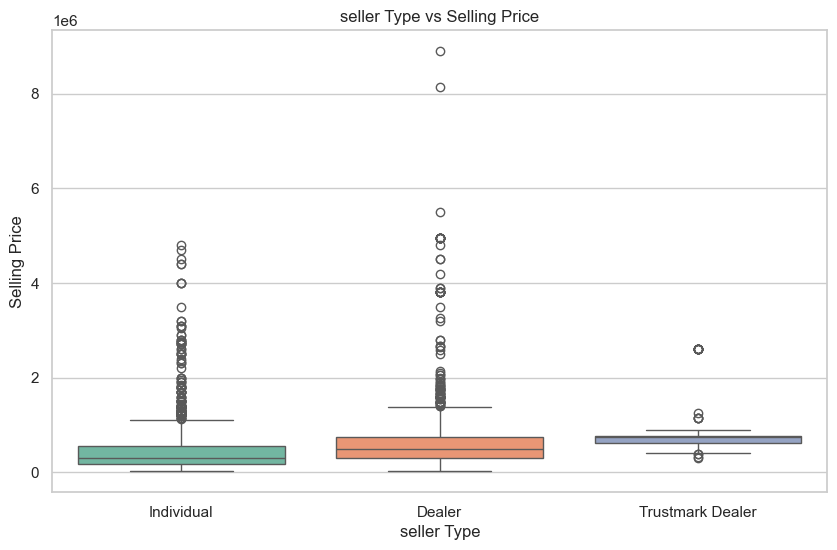

In [93]:
# Does the seller type affect selling price?
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df_main, palette="Set2")

# Adding title and labels
plt.title('seller Type vs Selling Price')
plt.xlabel('seller Type')
plt.ylabel('Selling Price')

# Show the plot
plt.show()

In [91]:
# No big difference in selling price between Individual and Dealer

C:\Users\Seif Hisham\AppData\Local\Temp\ipykernel_23260\1491000967.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




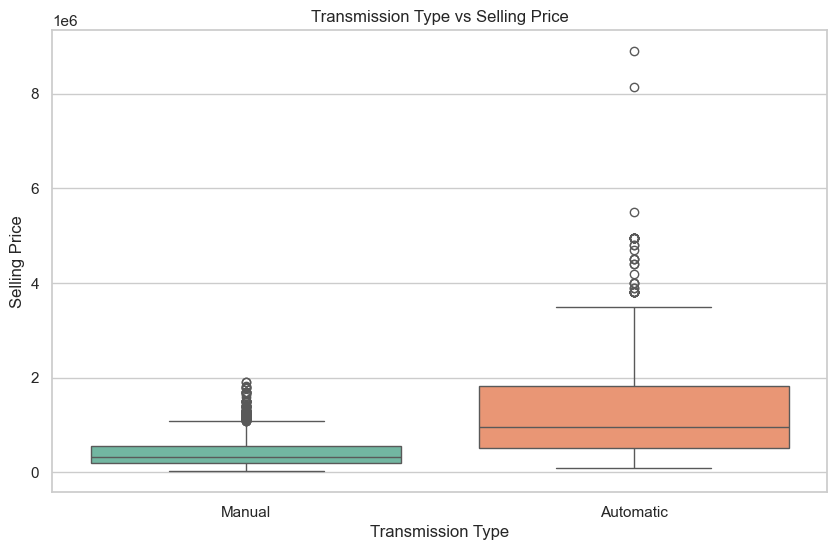

In [95]:
# Does the transmission type affect selling price?
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df_main, palette="Set2")

# Adding title and labels
plt.title('Transmission Type vs Selling Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')

# Show the plot
plt.show()

In [ ]:
# Automatic is much more higher in price than manual

In [103]:
y = df_main['selling_price']
x = df_main.drop('selling_price',axis=1)

In [105]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3424, 6)
x test:  (857, 6)
y train:  (3424,)
y test:  (857,)


In [111]:
df_main.head()

selling_price  km_driven    fuel seller_type transmission  Age  Owner_Code
0          60000      70000  Petrol  Individual       Manual   17           1
1         135000      50000  Petrol  Individual       Manual   17           1
2         600000     100000  Diesel  Individual       Manual   12           1
3         250000      46000  Petrol  Individual       Manual    7           1
4         450000     141000  Diesel  Individual       Manual   10           2

In [125]:
from sklearn.preprocessing import RobustScaler
 
rc = RobustScaler()
 
scaling_cols = ['km_driven','Age','Owner_Code']
 
scaling_cols

['km_driven', 'Age', 'Owner_Code']

In [127]:
x_train[scaling_cols] = rc.fit_transform(x_train[scaling_cols])
 
x_test[scaling_cols] = rc.transform(x_test[scaling_cols])

In [131]:
x_train

km_driven    fuel seller_type transmission  Age  Owner_Code
2597  -0.818182  Diesel  Individual       Manual -0.8         0.0
437    0.272727  Petrol  Individual    Automatic  0.4         1.0
1764   0.181818  Diesel  Individual       Manual  0.0         2.0
390   -0.363636  Petrol  Individual       Manual  0.0         1.0
30    -0.018182  Diesel      Dealer    Automatic  0.2         0.0
...         ...     ...         ...          ...  ...         ...
3489  -0.181818  Petrol  Individual       Manual -0.6         0.0
470    1.090909  Petrol  Individual       Manual  1.0         1.0
3133   1.090909  Diesel  Individual       Manual  1.2         2.0
3826   0.000000  Petrol  Individual       Manual  1.0         2.0
867   -1.000000  Petrol  Individual       Manual -0.8         0.0

[3424 rows x 6 columns]

In [143]:
from sklearn.preprocessing import OneHotEncoder
 
ohe = OneHotEncoder(drop= 'first', sparse_output = False)
 
x_train_ohe = ohe.fit_transform(x_train[['fuel','seller_type','transmission']])
 
x_test_ohe = ohe.transform(x_test[['fuel','seller_type','transmission']])
print(x_train_ohe)

[[0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1.]
 ...
 [0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1.]]


In [151]:
x_train_ohe = pd.DataFrame(x_train_ohe, columns= ohe.get_feature_names_out())
 
x_test_ohe = pd.DataFrame(x_test_ohe, columns= ohe.get_feature_names_out())
x_train_ohe

fuel_Others  fuel_Petrol  seller_type_Individual  \
0             0.0          0.0                     1.0   
1             0.0          1.0                     1.0   
2             0.0          0.0                     1.0   
3             0.0          1.0                     1.0   
4             0.0          0.0                     0.0   
...           ...          ...                     ...   
3419          0.0          1.0                     1.0   
3420          0.0          1.0                     1.0   
3421          0.0          0.0                     1.0   
3422          0.0          1.0                     1.0   
3423          0.0          1.0                     1.0   

      seller_type_Trustmark Dealer  transmission_Manual  
0                              0.0                  1.0  
1                              0.0                  0.0  
2                              0.0                  1.0  
3                              0.0                  1.0  
4                              0.0                  0.0  
...                            ...                  ...  
3419                           0.0                  1.0  
3420                           0.0                  1.0  
3421                           0.0                  1.0  
3422                           0.0                  1.0  
3423                           0.0                  1.0  

[3424 rows x 5 columns]

In [153]:
x_train.reset_index(drop= True, inplace= True)
 
x_test.reset_index(drop= True, inplace= True)

In [155]:
x_train = pd.concat([x_train, x_train_ohe], axis= 1).drop(['fuel','seller_type','transmission'], axis= 1)
 
x_test = pd.concat([x_test, x_test_ohe], axis= 1).drop(['fuel','seller_type','transmission'], axis= 1)
x_train

km_driven  Age  Owner_Code  fuel_Others  fuel_Petrol  \
0     -0.818182 -0.8         0.0          0.0          0.0   
1      0.272727  0.4         1.0          0.0          1.0   
2      0.181818  0.0         2.0          0.0          0.0   
3     -0.363636  0.0         1.0          0.0          1.0   
4     -0.018182  0.2         0.0          0.0          0.0   
...         ...  ...         ...          ...          ...   
3419  -0.181818 -0.6         0.0          0.0          1.0   
3420   1.090909  1.0         1.0          0.0          1.0   
3421   1.090909  1.2         2.0          0.0          0.0   
3422   0.000000  1.0         2.0          0.0          1.0   
3423  -1.000000 -0.8         0.0          0.0          1.0   

      seller_type_Individual  seller_type_Trustmark Dealer  \
0                        1.0                           0.0   
1                        1.0                           0.0   
2                        1.0                           0.0   
3                        1.0                           0.0   
4                        0.0                           0.0   
...                      ...                           ...   
3419                     1.0                           0.0   
3420                     1.0                           0.0   
3421                     1.0                           0.0   
3422                     1.0                           0.0   
3423                     1.0                           0.0   

      transmission_Manual  
0                     1.0  
1                     0.0  
2                     1.0  
3                     1.0  
4                     0.0  
...                   ...  
3419                  1.0  
3420                  1.0  
3421                  1.0  
3422                  1.0  
3423                  1.0  

[3424 rows x 8 columns]

### Linear Regression

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
 
le = LinearRegression()
 
le.fit(x_train, np.log(y_train))
 
print('Training Score R2 : ', round(le.score(x_train, np.log(y_train)) * 100, 2))   # In this step, it calculates y_predict, then compare it with actual y_train
 
print('Test Score R2 : ', round(le.score(x_test, np.log(y_test)) * 100, 2))
 
print('Training Score MSE : ', mean_squared_error(y_train, le.predict(x_train)))   # In this step, it calculates y_predict, then compare it with actual y_train
 
print('Test Score MSE : ', mean_squared_error(y_test, le.predict(x_test)))

Training Score R2 :  68.66
Test Score R2 :  67.33
Training Score MSE :  610198510065.954
Test Score MSE :  519824560449.98413


### Ridge

In [163]:
from sklearn.linear_model import Ridge
 
rd = Ridge()
 
rd.fit(x_train, np.log(y_train))
 
print('Training Score R2 : ', round(rd.score(x_train, np.log(y_train)) * 100, 2))
 
print('Test Score R2 : ', round(rd.score(x_test, np.log(y_test)) * 100, 2))

Training Score R2 :  68.66
Test Score R2 :  67.34


### Cross Validation

In [176]:
from sklearn.model_selection import cross_validate
 
cv = cross_validate(LinearRegression(),x_train,y_train,cv = 5 , return_train_score= True)
print(cv['train_score']*100)
print(cv['test_score']*100)

[46.10728422 48.8020223  45.60787609 44.5691937  44.82376938]
[42.73485885 37.64413609 46.92113821 50.97296046 49.20429766]


In [178]:
from sklearn.model_selection import cross_validate
 
cv = cross_validate(Ridge(),x_train,y_train,cv = 5 , return_train_score= True)
print(cv['train_score']*100)
print(cv['test_score']*100)

[46.10667946 48.80137955 45.60725384 44.56859687 44.82313107]
[42.84580404 37.61498993 46.95174176 50.95026617 49.18871511]


In [180]:
df_main.head()

selling_price  km_driven    fuel seller_type transmission  Age  Owner_Code
0          60000      70000  Petrol  Individual       Manual   17           1
1         135000      50000  Petrol  Individual       Manual   17           1
2         600000     100000  Diesel  Individual       Manual   12           1
3         250000      46000  Petrol  Individual       Manual    7           1
4         450000     141000  Diesel  Individual       Manual   10           2

Based on the results of the evaluation of the regression being around 70 % and after cross validation being around 45 %;
The issue with the model may be from the following:
1. Data Quality and Variability: seller_type and transmission having limited variability
2. Model Complexity
3. Imbalanced Data